In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"    
import tensorflow

In [2]:
import keras
import pandas as pd
import numpy as np
data_csv=pd.read_csv(r'C:\Users\HIRANMAYI\Final year project\dataset.csv',delimiter=',')

data_npz=np.array(data_csv)

Using TensorFlow backend.


In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv1D, MaxPooling1D

In [4]:
df=data_csv
df_x=df.iloc[:,0:394].values.reshape(len(df),394,1)
y=df.iloc[:,394].values.reshape(len(df),1)
print("x=",df_x.shape)
print("y=",y.shape)

x= (25345, 394, 1)
y= (25345, 1)


In [5]:
df_x=np.array(df_x)
y=np.array(y)

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x,y,test_size=0.3, random_state=0)
print(x_test.shape)
print(y_test.shape)

(7604, 394, 1)
(7604, 1)


In [7]:
import tensorflow as tf 
model =Sequential(name="model_conv1D")
#model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(394,1)))
model.add(Conv1D(filters=64, kernel_size=7, activation='relu', name="Conv1D_1",input_shape=(394,1)))
model.add(Dropout(0.5))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', name="Conv1D_2"))
model.add(Conv1D(filters=16, kernel_size=2, activation='relu', name="Conv1D_3"))
model.add(MaxPooling1D(pool_size=2, name="MaxPooling1D"))
model.add(Flatten())
model.add(Dense(32, activation='relu', name="Dense_1"))
model.add(Dense(1, name="Dense_2"))
#optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss='mse',optimizer='adam',metrics=['mae'])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model_conv1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1D_1 (Conv1D)            (None, 388, 64)           512       
_________________________________________________________________
dropout (Dropout)            (None, 388, 64)           0         
_________________________________________________________________
Conv1D_2 (Conv1D)            (None, 386, 32)           6176      
_________________________________________________________________
Conv1D_3 (Conv1D)            (None, 385, 16)           1040      
_________________________________________________________________
MaxPooling1D (MaxPooling1D)  (None, 192, 16)           0         
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0         
_______________________________________

In [8]:
history = model.fit(x_train, y_train, epochs=100,
                    validation_split=0.3, verbose=1)

Train on 12418 samples, validate on 5323 samples
Epoch 1/100
12418/12418 [==============================] - 19s 2ms/sample - loss: 212.3768 - mean_absolute_error: 10.4623 - val_loss: 117.8660 - val_mean_absolute_error: 8.7335
Epoch 2/100
12418/12418 [==============================] - 19s 2ms/sample - loss: 109.3538 - mean_absolute_error: 8.3283 - val_loss: 172.1829 - val_mean_absolute_error: 11.0101
Epoch 3/100
12418/12418 [==============================] - 18s 1ms/sample - loss: 82.0061 - mean_absolute_error: 7.1599 - val_loss: 67.0692 - val_mean_absolute_error: 6.3810
Epoch 4/100
12418/12418 [==============================] - 18s 1ms/sample - loss: 68.3771 - mean_absolute_error: 6.5169 - val_loss: 64.9954 - val_mean_absolute_error: 6.4756
Epoch 5/100
12418/12418 [==============================] - 18s 1ms/sample - loss: 58.7602 - mean_absolute_error: 6.0328 - val_loss: 64.9671 - val_mean_absolute_error: 6.5449
Epoch 6/100
12418/12418 [==============================] - 19s 2ms/sample -

12418/12418 [==============================] - 24s 2ms/sample - loss: 19.6466 - mean_absolute_error: 3.4193 - val_loss: 27.0242 - val_mean_absolute_error: 4.1313
Epoch 94/100
12418/12418 [==============================] - 24s 2ms/sample - loss: 20.0878 - mean_absolute_error: 3.4580 - val_loss: 21.8582 - val_mean_absolute_error: 3.5575
Epoch 95/100
12418/12418 [==============================] - 19s 2ms/sample - loss: 19.5444 - mean_absolute_error: 3.4128 - val_loss: 20.9056 - val_mean_absolute_error: 3.4173
Epoch 96/100
12418/12418 [==============================] - 20s 2ms/sample - loss: 19.9002 - mean_absolute_error: 3.4446 - val_loss: 20.5024 - val_mean_absolute_error: 3.3901
Epoch 97/100
12418/12418 [==============================] - 19s 2ms/sample - loss: 19.7655 - mean_absolute_error: 3.4227 - val_loss: 20.1084 - val_mean_absolute_error: 3.3919
Epoch 98/100
12418/12418 [==============================] - 20s 2ms/sample - loss: 19.2299 - mean_absolute_error: 3.3832 - val_loss: 25.20

In [9]:
yhat1=model.predict(x_test)
avg_yield=np.mean(yhat1)
print("yhat=",yhat1.shape)
print("average yield=",avg_yield)

yhat= (7604, 1)
average yield= 38.56159


In [10]:
mse=np.mean(np.square(y_test-yhat1))
rmse=np.sqrt(np.mean(np.square(y_test-yhat1)))
mae=np.mean(abs(y_test-yhat1))
print("Test mse=",mse)
print("Test rmse=",rmse)
print("Test mae=",mae)


Test mse= 22.234937637466984
Test rmse= 4.71539368849166
Test mae= 3.5263401212973196


In [11]:
yhat2=model.predict(x_train)
print("yhat=",yhat2.shape)

yhat= (17741, 1)


In [12]:
mse=np.mean(np.square(y_train-yhat2))
rmse=np.sqrt(np.mean(np.square(y_train-yhat2)))
mae=np.mean(abs(y_train-yhat2))
print("train mse=",mse)
print("train rmse=",rmse)
print("train mae=",mae)


train mse= 17.310353431658072
train rmse= 4.16057128669346
train mae= 3.1531136590164106


In [13]:
s=model.evaluate(x_train,y_train)
print("train score:",s)

st=model.evaluate(x_test,y_test)
print("test score:",st)

17741/17741 [==============================] - 4s 227us/sample - loss: 17.3104 - mean_absolute_error: 3.1531
train score: [17.31035344107875, 3.153116]
7604/7604 [==============================] - 2s 207us/sample - loss: 22.2349 - mean_absolute_error: 3.5263
test score: [22.234937639251502, 3.526341]


In [14]:
from sklearn.metrics import r2_score
print("r^2 test score:",r2_score(y_test,yhat1))
print("r^2 train score:",r2_score(y_train,yhat2))

r^2 test score: 0.8182867271121073
r^2 train score: 0.8574864914538775


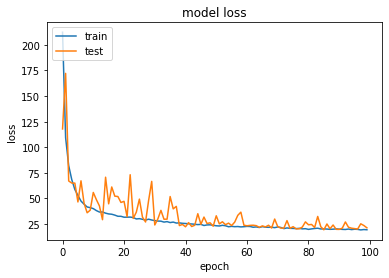

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
import pickle
filename="Yield.sav"
pickle.dump(history.history,open(filename,'wb'))

In [19]:
import pickle
filename="CNN_Model.pkl"
pickle.dump(history.history,open(filename,'wb'))

In [20]:
model.save("Yield.h5")